In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import Adam 

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

print(x_train.shape[0])
print(x_train.shape[1])
print(x_train.shape[2])
print(x_train.shape[3])

11501568/11490434 [==============================] - 0s 0us/step
60000
28
28
1


In [ ]:
def cnn():
  model=Sequential()
  
  model.add(Conv2D(input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),filters=50,kernel_size=(3,3),strides=(1,1),padding='same',kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Conv2D(filters=50,kernel_size=(3,3),strides=(1,1),padding='same',kernel_initializer='he_normal'))
  model.add(Conv2D(filters=25,kernel_size=(1,1),strides=(1,1),padding='valid',kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters=50,kernel_size=(3,3),strides=(1,1),padding='same',kernel_initializer='he_normal'))
  model.add(Conv2D(filters=25,kernel_size=(1,1),strides=(1,1),padding='valid',kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Conv2D(filters=50, kernel_size=(3,3),strides=(1,1),padding='same',kernel_initializer='he_normal'))
  model.add(Conv2D(filters=25, kernel_size=(1,1),strides=(1,1),padding='valid',kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters=50,kernel_size=(3,3),strides= (1,1),padding='same',kernel_initializer='he_normal'))
  model.add(Conv2D(filters=25,kernel_size=(1,1),strides=(1,1),padding ='valid',kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Conv2D(filters=50, kernel_size=(3,3),strides=(1,1),padding='same',kernel_initializer='he_normal'))
  model.add(Conv2D(filters=25, kernel_size=(1,1),strides=(1,1),padding='valid',kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))


  model.add(Flatten())
  model.add(Dense(50,activation='relu',kernel_initializer='he_normal'))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation='softmax',kernel_initializer='he_normal'))


  adam=Adam(lr=0.001)
  model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
  return model

In [ ]:
model=cnn()

history=model.fit(x_train,y_train,batch_size=50,validation_split=0.2,epochs=100,verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


960/960 [==============================] - 12s 12ms/step - loss: 0.4129 - accuracy: 0.8679 - val_loss: 0.0578 - val_accuracy: 0.9827
Epoch 2/100
960/960 [==============================] - 9s 9ms/step - loss: 0.1358 - accuracy: 0.9613 - val_loss: 0.0765 - val_accuracy: 0.9784
Epoch 3/100
960/960 [==============================] - 9s 9ms/step - loss: 0.1025 - accuracy: 0.9710 - val_loss: 0.0683 - val_accuracy: 0.9808
Epoch 4/100
960/960 [==============================] - 9s 9ms/step - loss: 0.0852 - accuracy: 0.9757 - val_loss: 0.0579 - val_accuracy: 0.9829
Epoch 5/100
960/960 [==============================] - 9s 9ms/step - loss: 0.0734 - accuracy: 0.9787 - val_loss: 0.0395 - val_accuracy: 0.9890
Epoch 6/100
960/960 [==============================] - 9s 9ms/step - loss: 0.0718 - accuracy: 0.9805 - val_loss: 0.0371 - val_accuracy: 0.9911
Epoch 7/100
960/960 [==============================] - 9s 9ms/step - loss: 0.0620 - accuracy: 0.9821 - val_loss: 0.0434 - val_accuracy: 0.9889
Epoch 8/1

In [ ]:
results=model.evaluate(x_test, y_test)
print('Test accuracy:',results[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0451 - accuracy: 0.9936
Test accuracy: 0.9936000108718872


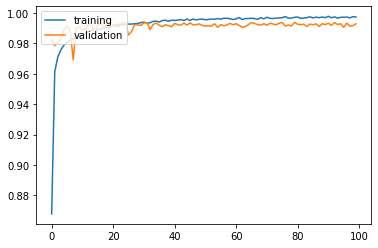

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'],loc ='upper left')
plt.show()